In [6]:
import numpy as np
import matplotlib.pyplot as plt

**Se aplicara forward propagation al siguiente modelo para la creacion de la funcion XOR:**

<img src="forwProp.png">

Dada la naturalez del problema, utilizaremos la funcion binary step como funcion de activacion: 

<img src="actFunc.png">


Ahora, procedemos con settear los valores de nuestro modelo. Se tendran dos matrices de pesos, una para la capa oculta y otra para la capa de salida:

In [8]:
#Matriz de pesos de la capa oculta:
w01 = np.array([[20,20,-10],   #Primera neurona.
                [-20,-20,30]]) #Segunda neurona.

#Matriz de pesos de la salida:
w02 = np.array([20,20,-30])

#Datos de entrada:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

#Datos de salida:

Y = np.array([[0],[1],[1],[0]])

Ahora, para tener un diseño mas modular, crearemos funciones, tanto para la funcion de activacion como para el desarrollo de forward-propagation:

Nota: Hay que tomar en cuenta que la funcion de activacion se aplica unicamente a los datos de salida.

In [89]:
#Funcion de activacion:
def activFunc(x):
    '''
    Funcion de activacion binary step. Devuelve 0 para valores negativos y 1 para valores positivos.
    Input: Un vector de cualquier shape.
    Output: Un vector del mismo shape.
    '''
    return (x>=0)*1.0

#Creacion de la funcion forwardPropagation:
def forwardProp(x=X):
    '''
    Se aplica forward propagation al modelo:
    '''
    #Forward Propagation para la capa oculta:
    Z_01 = np.matmul(x,w01.transpose())
    
    #Agregando el bias a la salida de la primera capa y aplicando la funcion de activacion:
    a_01 = activFunc(np.append(Z_01,biasColumn, axis=1))
    
    #Forward Propagation para la capa de salida:
    Z_02 = np.matmul(a_01,w02.transpose())
    
    #Aplicando la funcion de activacion:
    a_02 = activFunc(Z_02)
    
    return(a_02,a_01)

Ahora aplicamos el modelo a los valores de entrada:

In [84]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [93]:
outModel = forwardProp(x = np.append(X,biasColumn, axis=1))
print(outModel[0])

[0. 1. 1. 0.]


In [95]:
outModel[1]

array([[0., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.]])

El modelo funciona correctamente! (tomar en cuenta que el vector de salida "outModel[0]" muestra la salida del modelo para todo el tensor de entrada, es decir los cuatro posibles valores de X. Para la primera entrada (0,0) en X, la respuesta es cero, para la segunda entrada (1,1) la respuesta es 1 y asi sucesivamente) 

### Graficas: 

La salida de la primera capa estan en la varible a_01 de la funcion forwardProp, h1 es la primera columna y h2 la segunda. La salida de la tercera neurona, es la salida del modelo en si, por lo tanto tendremos tres gráficas (una por cada neurona).

In [112]:
outNeurona01 = outModel[1][:,0]
outNeurona02 = outModel[1][:,1]
outNeurona03 = outModel[0]
X01 = X[:,0]
X02 = X[:,1]

Text(0, 0.5, 'x2')

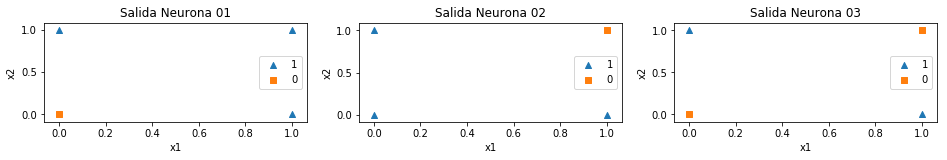

In [190]:
plt.figure(figsize=(16, 4))

plt.subplot(2,3,1)
plt.scatter(X01[outNeurona01>=1], X02[outNeurona01>=1], marker='^', label='1')
plt.scatter(X01[outNeurona01<1], X02[outNeurona01<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 01")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(2,3,2)
plt.scatter(X01[outNeurona02>=1], X02[outNeurona02>=1], marker='^', label='1')
plt.scatter(X01[outNeurona02<1], X02[outNeurona02<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 02")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(2,3,3)
plt.scatter(X01[outNeurona03>=1], X02[outNeurona03>=1], marker='^', label='1')
plt.scatter(X01[outNeurona03<1], X02[outNeurona03<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 03")
plt.xlabel("x1")
plt.ylabel("x2")

## Conclusiones:

* La primera neurona de la capa oculta, devuelve una salida cero unicamente cuando los valores de entrada son ceros ambos, por tanto, la primera neurona funciona como una compuerta **OR**


* La segunda neurona de funciona funciona como una compuerta **and negada (NAND)** puesto que devuelve cero unicamente cuando los dos valores de entrada son 1.


* Por ultimo, vemos que la tercera neurona ya devuelve el comportamiento deseado, puesto que es la capa de salida.


* Al momento de explorar las capas intermedias se vuelve evidente la aplicacion de funciones compuestas para obtener el comportamiento deseado.